# Extracting texts

In [1]:
import pandas as pd
import numpy as np
import pickle

file_path = "/mnt/nas/cinus/SocialAIGym/data/raw/Brexit/processed_tweet_and_retweet_data.pkl"
columns_to_select = [
    'author_id_ORIGINAL', 'id_ORIGINAL', 'text_ORIGINAL',
    'author_id_RETWEET', 'id_RETWEET', 'text_RETWEET'
]

def load_selected_columns(file_path, columns):
    # Read the entire dataframe first
    df = pd.read_pickle(file_path)
    # Select the specified columns and ensure all are strings
    df_selected = df[columns].astype(str)
    return df_selected

df_selected = load_selected_columns(file_path, columns_to_select)
df_selected = df_selected.reset_index()

display(df_selected.head())


,index,author_id_ORIGINAL,id_ORIGINAL,text_ORIGINAL,author_id_RETWEET,id_RETWEET,text_RETWEET
0,0,201664833,755343961233977344,My 81 year old dad has signed up as a register...,330543773,755439263387443200,RT @mathewhbenham: My 81 year old dad has sign...
1,1,201664833,745702715272077312,Beep! Beep! The car is ready for tomorrow. We ...,19081463,745763604851531776,RT @mathewhbenham: Beep! Beep! The car is read...
2,2,201664833,745337739126673408,@SadiqKhan has just owned @GiselaStuart big ti...,22186521,745338438250016768,RT @mathewhbenham: @SadiqKhan has just owned @...
3,3,201664833,745332404882186240,Great opening speech by @SadiqKhan A #voterema...,265281570,745332908286676992,RT @mathewhbenham: Great opening speech by @Sa...
4,4,201664833,744921630967730176,Our cat loves Gourmet Cat Food. #CatsAgainstBr...,340924056,744976903665233920,RT @mathewhbenham: Our cat loves Gourmet Cat F...


In [2]:
import pickle

with open("/mnt/nas/cinus/SocialAIGym/data/raw/Brexit/brexit_07_tweets_ids.pkl", "rb") as file_handle:
    tweet_ids = pickle.load(file_handle)

print(f"Available texts: {len(set(tweet_ids)) - len(set(tweet_ids).difference(set(df_selected['id_ORIGINAL'].unique()))):_} / {len(set(tweet_ids)):_}")



Available texts: 19_960 / 19_960


In [3]:
len(tweet_ids)

19960

In [4]:
import pickle

with open("/mnt/nas/cinus/SocialAIGym/data/raw/Brexit/brexit_07_propagations_and_polarities.pkl", "rb") as file_handle:
    propagations, polarities = pickle.load(file_handle) # propagations are ordered by time (first active --> last active)

print(f"Available propagations: {len(propagations):_}")


Available propagations: 19_960


In [5]:
# tweet_pop = list(map(lambda x: len(x), propagations))

# compute tweet pop from the dataframe
# Compute the number of retweets for each original tweet
retweet_counts = df_selected['id_ORIGINAL'].value_counts().reset_index()
retweet_counts.columns = ['id_ORIGINAL', 'retweet_count']

# Filter out tweets with less than 5 retweets
min_retweets = 5
filtered_retweets = retweet_counts[retweet_counts['retweet_count'] >= min_retweets]

import numpy as np
print('Popularity stats from propagation list:')
# print('Mean pop: ', np.mean(tweet_pop))
# print('std pop: ', np.std(tweet_pop))
# print('Min pop: ', np.min(tweet_pop))
# print('Max pop: ', np.max(tweet_pop))
# print('---')
print('Popularity stats from dataframe:')
print('Mean pop: ', np.mean(filtered_retweets['retweet_count']))
print('std pop: ', np.std(filtered_retweets['retweet_count']))
print('Min pop: ', np.min(filtered_retweets['retweet_count']))
print('Max pop: ', np.max(filtered_retweets['retweet_count']))



Popularity stats from propagation list:
Popularity stats from dataframe:
Mean pop:  11.64455947374097
std pop:  20.34021660455174
Min pop:  5
Max pop:  870


In [6]:
userFeat = pd.read_csv('/mnt/nas/cinus/SocialAIGym/data/raw/Brexit/df_user_features.csv')
with open("/mnt/nas/cinus/SocialAIGym/data/raw/Brexit/brexit_07_username2index.pkl", "rb") as file_handle:
    user2index = pickle.load(file_handle) # propagations are ordered by time (first active --> last active)


In [7]:
mapAuthorId2Node = {}
userId_not_present_in_the_graph = list()

for rowId, row in userFeat[['user_id', 'username']].iterrows():
    if row['username'] in user2index:
        mapAuthorId2Node[row['user_id']] = user2index[row['username']]
    else:
        userId_not_present_in_the_graph.append(row['user_id'])
        

-------

## Compute the number of retweets for each original tweet

## Plot the histogram of the number of retweets

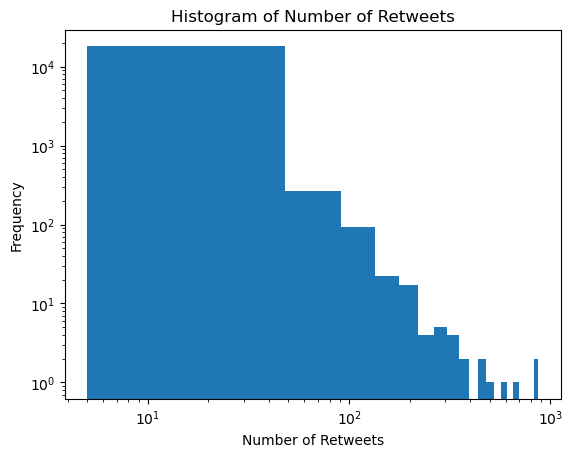

In [8]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(filtered_retweets['retweet_count'], bins=20)
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram of Number of Retweets')
plt.show()


# Import Stance Classifier (Skip if running more than once)

## Create network and information diffusion model (Skip if running more than once)

## Clean the text and compute the stance (Skip if running more than once)


## Estimate the number of activated users (Skip if run more than once)

## Display real viral tweets

In [9]:
filtered_retweets = pd.read_csv(f'/mnt/nas/minici/SocialAIGym/notebooks/retweet2BCM_eps{0.2}.csv', lineterminator='\n', index_col=0) 


In [41]:
filtered_retweets[filtered_retweets['stance'] < 0.5].sort_values(by=['estimated_activated_users'], ascending=False).head(50)



,id_ORIGINAL,retweet_count,text_ORIGINAL,cleaned_text,stance,estimated_activated_users
161741,734679361559859200,7,Voor wie het nog steeds niet weet: de euro is ...,Voor wie het nog steeds niet weet: de euro is ...,0.198736,2701.0
193485,734135319126216704,5,Paris Police Invoke State of Emergency to Prev...,Paris Police Invoke State of Emergency to Prev...,0.196897,2701.0
177118,727877455491510272,6,#JeSuisUncleTom #JeSuisCoconut #JeSuisBounty #...,#JeSuisUncleTom #JeSuisCoconut #JeSuisBounty #...,0.198538,2701.0
164296,749237005469491201,7,Worth noting that Corbyn is ignoring the #marc...,Worth noting that Corbyn is ignoring the #marc...,0.198586,2700.0
146488,747923183337078784,9,@haloefekti UK fish quotas remain for now &amp...,@haloefekti UK fish quotas remain for now &amp...,0.198586,2700.0
205905,731951421155872768,5,No words 😢😢😢💔💔💔\n#StopAnimalTests https://t.co...,No words \n#StopAnimalTests,0.197778,2700.0
156269,753001239181398017,8,@IainMcNicol @LabourEoin has just pointed out ...,@IainMcNicol @LabourEoin has just pointed out ...,0.198586,2700.0
58051,732698820014931969,32,RM Sgt Blackman served our #UK loyally for mor...,RM Sgt Blackman served our #UK loyally for mor...,0.198586,2700.0
186634,742101542610849792,6,#Bundestag condemns #Turkey &amp; #Erdogan thr...,#Bundestag condemns #Turkey &amp; #Erdogan thr...,0.198586,2700.0
141295,735569870415400961,9,@Mylegalforum Salford report #Sanctions vulner...,@Mylegalforum Salford report #Sanctions vulner...,0.196861,2700.0


In [42]:
for t in filtered_retweets[filtered_retweets['stance'] < 0.5].sort_values(by=['estimated_activated_users'], ascending=False).head(50).text_ORIGINAL:
    print()
    print(t)




Voor wie het nog steeds niet weet: de euro is een ramp https://t.co/a4wcyfitZD

Paris Police Invoke State of Emergency to Prevent Labor Code Protests
https://t.co/9tWrZl0oJ0
EU unrest is widespread #StrongerIN ? #Brexit

#JeSuisUncleTom #JeSuisCoconut #JeSuisBounty #JeSuisOreos

Take your Labour-issued race card and stuff it.

Worth noting that Corbyn is ignoring the #marchforeurope today it seems. He's on an actual, bigger, lost cause: a march for himself

@haloefekti UK fish quotas remain for now &amp; as smaller country may even be reduced #Brexit https://t.co/1fyQciJfVy https://t.co/R1wwgOpfaJ

No words 😢😢😢💔💔💔
#StopAnimalTests https://t.co/gaMHQitfmB

@IainMcNicol @LabourEoin has just pointed out #LabourNEC in legal trouble. Promised recent new members a vote https://t.co/SHSfFNKXi2

RM Sgt Blackman served our #UK loyally for more than 17 years.Sold out in an act of appeasement. @justiceforBigAl https://t.co/S9Qv1kQbwR

#Bundestag condemns #Turkey &amp; #Erdogan threat to #German 

In [39]:
filtered_retweets[filtered_retweets['stance'] > 0.5].sort_values(by=['estimated_activated_users'], ascending=False).head(50)



,id_ORIGINAL,retweet_count,text_ORIGINAL,cleaned_text,stance,estimated_activated_users
76755,743058291421523968,22,"Before Bob Geldof set sail on Thames, he recor...","Before Bob Geldof set sail on Thames, he recor...",0.807820,3742.0
195400,729747911333052416,5,Full house for @LIGNetwork #brexit discussion ...,Full house for @LIGNetwork #brexit discussion ...,0.802013,3742.0
169770,743102329470234624,7,David Cameron issues warning over Brexit borde...,David Cameron issues warning over Brexit borde...,0.807820,3742.0
85371,745642546425135104,19,Safeguard your future tomorrow. #EUref @Avaaz ...,Safeguard your future tomorrow. #EUref @Avaaz ...,0.800654,3742.0
192850,749656246354149378,5,Looking at the desperate level of 'adult' deba...,Looking at the desperate level of 'adult' deba...,0.804254,3739.0
112238,746743493389914112,13,Daily Mail readers react to their papers celeb...,Daily Mail readers react to their papers celeb...,0.807820,3739.0
76975,728633192450764800,22,Eton O - 1 Council Estate Well done...,Eton O - 1 Council Estate Well done...,0.808355,3739.0
107818,733671170696970240,13,TOMORROW: Join the Irish4Europe crew for canva...,TOMORROW: Join the Irish4Europe crew for canva...,0.810584,3739.0
97436,745624893853667329,16,WATCH this message from Geldof before you go t...,WATCH this message from Geldof before you go t...,0.810783,3739.0
172885,735125843891113984,7,Tony Blair calling for more war. He's like an ...,Tony Blair calling for more war. He's like an ...,0.807820,3739.0


In [40]:
for t in filtered_retweets[filtered_retweets['stance'] > 0.5].sort_values(by=['estimated_activated_users'], ascending=False).head(50).text_ORIGINAL:
    print()
    print(t)




Before Bob Geldof set sail on Thames, he recorded a message you need to see #flotilla #euref https://t.co/abSjCqov3m https://t.co/HY0NpFEOGk

Full house for @LIGNetwork #brexit discussion in the irish embassy. @GrainneMellon https://t.co/BwdSIAynUt

David Cameron issues warning over Brexit border controls https://t.co/Ed2chshzg7

Safeguard your future tomorrow. #EUref @Avaaz  Here's a final word from Bob Geldof, WATCH: https://t.co/LXwOC1BJBy https://t.co/v8L6PA0xgX

Looking at the desperate level of 'adult' debate on #EUref &amp; Tory PM selection surely time has come to lower the voting age across the UK?

Daily Mail readers react to their papers celebration of #Brexit victory - and it's hilarious https://t.co/JVgitNufKk https://t.co/2TR6gwfqBo

Eton  O - 1 Council Estate           Well done London!   #LondonElects

TOMORROW: Join the Irish4Europe crew for canvassing craic. 2.30pm outside The Alexandra pub at Clapham Common tube https://t.co/cwk1UoAYYL

WATCH this message from Geldo

## Display results with standard regression

             id_ORIGINAL  retweet_count  \
0     744579270731718656            870   
870   738764289192910848            833   
1703  743789791624445953            676   
2379  741429682738999296            597   
2976  745396716661248000            493   

                                          text_ORIGINAL  \
0     Guess who Egyptian Media blame for terror atta...   
870   You had one job. One job. https://t.co/bYeqKdGMBC   
1703  Found this clip I filmed of One Direction #1D ...   
2379  Here are 2 billionaires. 1 pays his UK taxes &...   
2976  Dear Race-baiter Remainers\n\nI'm bullish on B...   

                                           cleaned_text    stance  \
0     Guess who Egyptian Media blame for terror atta...  0.652740   
870                          You had one job. One job.   0.288147   
1703  Found this clip I filmed of One Direction #1D ...  0.327798   
2379  Here are 2 billionaires. 1 pays his UK taxes &...  0.222568   
2976  Dear Race-baiter Remainers\n\nI'm b

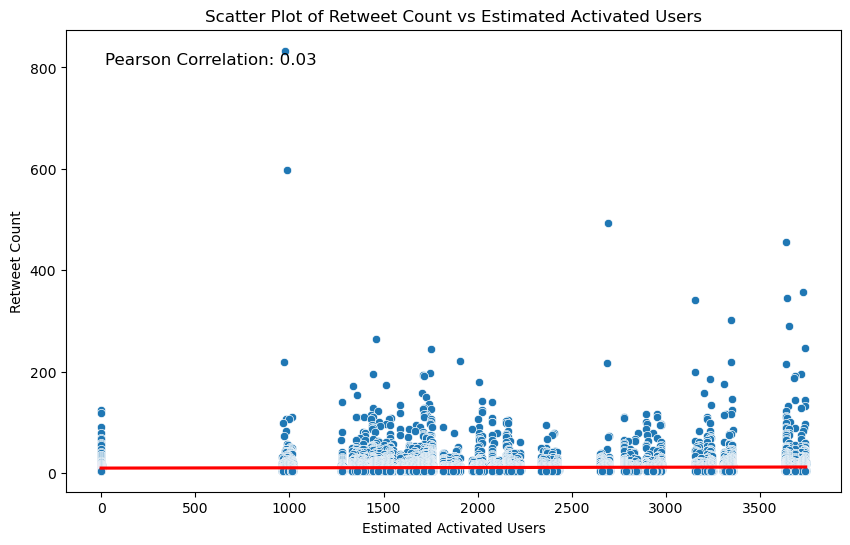

In [9]:
filtered_retweets = pd.read_csv(f'/mnt/nas/minici/SocialAIGym/notebooks/retweet2BCM_eps{0.2}.csv', lineterminator='\n', index_col=0) 
epsilon2numActivated = {0.2: filtered_retweets}
print(filtered_retweets.head())

for epsilon in [0.2]:  # [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]:
    filtered_retweets = epsilon2numActivated[epsilon].copy()
    # Drop rows with missing estimated activated users
    filtered_retweets = filtered_retweets.dropna(subset=['estimated_activated_users'])
    # FILTER=False
    # if FILTER:
    #     rt_top_percentile_val = 150# np.percentile(filtered_retweets['retweet_count'], 99)
    #     estimated_active_top_percentile_val = 1000# np.percentile(filtered_retweets['estimated_activated_users'], 50)
    #     filtered_retweets = filtered_retweets[filtered_retweets['retweet_count'] > rt_top_percentile_val]
        # filtered_retweets = filtered_retweets[filtered_retweets['estimated_activated_users'] > estimated_active_top_percentile_val]
    
    from scipy.stats import pearsonr
    
    # Compute the correlation
    correlation, p_value = pearsonr(filtered_retweets['estimated_activated_users'], filtered_retweets['retweet_count'])
    
    print(f'Correlation between number of retweets and estimated number of activated users: {correlation}')
    print(f'P-value: {p_value}')

    import seaborn as sns
    
    # Plot scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x='estimated_activated_users', 
            y='retweet_count', data=filtered_retweets, scatter_kws={'s': 10}, line_kws={'color': 'red'},
            scatter=False)
    sns.scatterplot(x='estimated_activated_users', 
            y='retweet_count', data=filtered_retweets,)
            # size='stance', alpha=0.7)
    plt.xlabel('Estimated Activated Users')
    plt.ylabel('Retweet Count')
    plt.title('Scatter Plot of Retweet Count vs Estimated Activated Users')
    
    # Display correlation on plot
    plt.text(0.05, 0.95, f'Pearson Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')




## Display results with standard regression by restricting to real tweets with more than 200 retweets

Correlation between number of retweets and estimated number of activated users: -0.35678707277171023
P-value: 0.15978484588459024


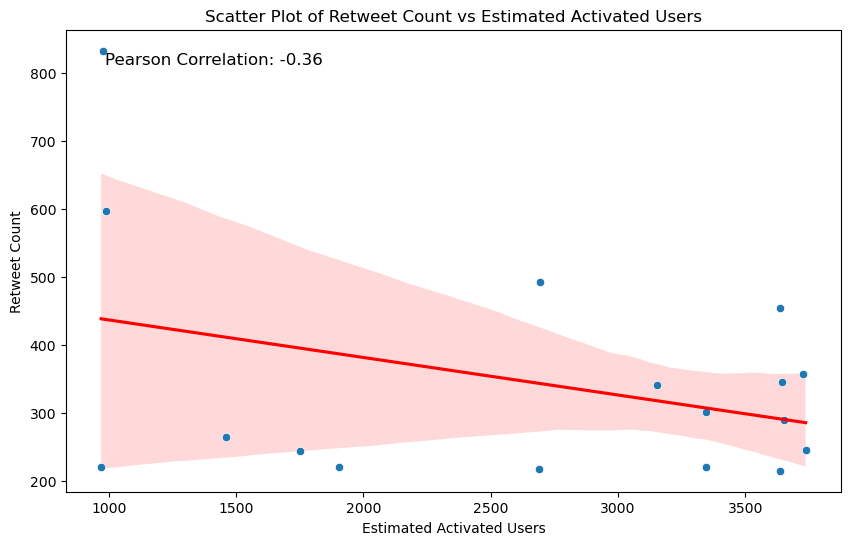

In [10]:
for epsilon in [0.2]:  # [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]:
    filtered_retweets = epsilon2numActivated[epsilon].copy()
    # Drop rows with missing estimated activated users
    filtered_retweets = filtered_retweets.dropna(subset=['estimated_activated_users'])
    FILTER=True
    if FILTER:
        rt_top_percentile_val = 200# np.percentile(filtered_retweets['retweet_count'], 99)
        estimated_active_top_percentile_val = 1000# np.percentile(filtered_retweets['estimated_activated_users'], 50)
        filtered_retweets = filtered_retweets[filtered_retweets['retweet_count'] > rt_top_percentile_val]
        # filtered_retweets = filtered_retweets[filtered_retweets['estimated_activated_users'] > estimated_active_top_percentile_val]
    
    from scipy.stats import pearsonr
    
    # Compute the correlation
    correlation, p_value = pearsonr(filtered_retweets['estimated_activated_users'], filtered_retweets['retweet_count'])
    
    print(f'Correlation between number of retweets and estimated number of activated users: {correlation}')
    print(f'P-value: {p_value}')

    import seaborn as sns
    
    # Plot scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x='estimated_activated_users', 
            y='retweet_count', data=filtered_retweets, scatter_kws={'s': 10}, line_kws={'color': 'red'},
            scatter=False)
    sns.scatterplot(x='estimated_activated_users', 
            y='retweet_count', data=filtered_retweets,)
            # size='stance', alpha=0.7)
    plt.xlabel('Estimated Activated Users')
    plt.ylabel('Retweet Count')
    plt.title('Scatter Plot of Retweet Count vs Estimated Activated Users')
    
    # Display correlation on plot
    plt.text(0.05, 0.95, f'Pearson Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')




## Display results with Robust Regression (RANSAC) and restricting to tweets with more than 200 retweets

/home/minici/anaconda3/envs/socLLM/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/minici/anaconda3/envs/socLLM/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/minici/anaconda3/envs/socLLM/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/minici/anaconda3/envs/socLLM/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/minici/anaconda3/envs/socLLM/lib/python3.12/site-packages/sklearn/metrics/_regress

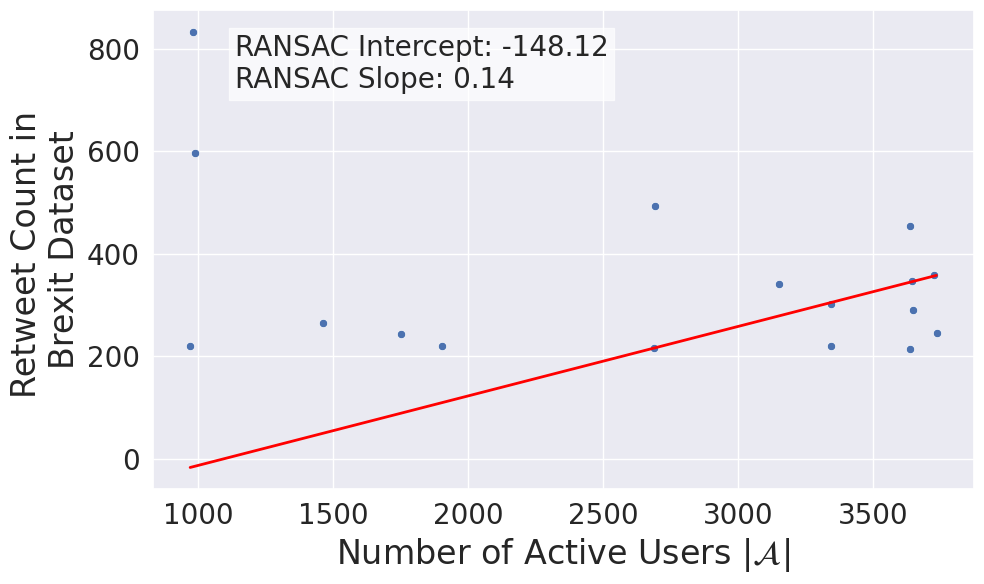

In [25]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

for epsilon in [0.2]:  # [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]:
    filtered_retweets = epsilon2numActivated[epsilon].copy()
    # Drop rows with missing estimated activated users
    filtered_retweets = filtered_retweets.dropna(subset=['estimated_activated_users'])
    FILTER=True
    if FILTER:
        rt_top_percentile_val = 200# np.percentile(filtered_retweets['retweet_count'], 99)
        estimated_active_top_percentile_val = 1000# np.percentile(filtered_retweets['estimated_activated_users'], 50)
        filtered_retweets = filtered_retweets[filtered_retweets['retweet_count'] > rt_top_percentile_val]
        # filtered_retweets = filtered_retweets[filtered_retweets['estimated_activated_users'] > estimated_active_top_percentile_val]
    
    from scipy.stats import pearsonr
    
    # Compute the correlation
    # correlation, p_value = pearsonr(filtered_retweets['estimated_activated_users'], filtered_retweets['retweet_count'])
    
    # print(f'Correlation between number of retweets and estimated number of activated users: {correlation}')
    # print(f'P-value: {p_value}')

    import seaborn as sns
    sns.set()
    # Plot scatter plot with regression line
    plt.figure(figsize=(10, 6))
    # sns.regplot(x='estimated_activated_users', 
    #         y='retweet_count', data=filtered_retweets, scatter_kws={'s': 10}, line_kws={'color': 'red'},
    #         scatter=False)
    sns.scatterplot(x='estimated_activated_users', 
            y='retweet_count', data=filtered_retweets,)
            # size='stance', alpha=0.7)
    # Fit RANSAC regressor
    ransac = RANSACRegressor(LinearRegression(), min_samples=5, residual_threshold=10.0, random_state=0)
    # ransac = RANSACRegressor(LinearRegression())
    X, y = filtered_retweets['estimated_activated_users'].values.reshape(-1, 1), filtered_retweets['retweet_count'].values.reshape(-1, 1)
    ransac.fit(X, y)
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    plt.plot(line_X, line_y_ransac, color='red', linewidth=2, label='RANSAC regression')
    plt.xlabel(r'Number of Active Users $|\mathcal{A}|$', fontsize=24)
    plt.ylabel('Retweet Count in \nBrexit Dataset', fontsize=24)
    # plt.title('Scatter Plot of Retweet Count vs Estimated Activated Users')
    
    # Display correlation on plot
    # plt.text(0.05, 0.95, f'Pearson Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Extract the intercept and slope (angular coefficient)
    intercept = ransac.estimator_.intercept_[0]
    slope = ransac.estimator_.coef_[0, 0]
    # Display Regression line coefficients for Robust Regression
    plt.text(0.1, 0.95, f'RANSAC Intercept: {intercept:.2f}\nRANSAC Slope: {slope:.2f}',
             transform=plt.gca().transAxes, fontsize=20, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.savefig(f'/mnt/nas/minici/SocialAIGym/notebooks/retweet2BCM_RANSAC_line{0.2}.pdf')
    